# word2vecとは何か？

word2vecを知りたいという時には、以下のキーワードが重要となると思います。

<span class="burk"><span class="mark">「単語の意味より使われ方」、「ベクトル」、「頻度より近さ（近いと思われる確率）」。</span></span>


私たちも、知らない言葉の意味を知りたいときは、周囲の言葉を見ます。

しかし、機械にはそもそも「意味」を教えられません。そのため、単語の「使われ方」を認識させることはできることが想起されました。

単語と単語のつながりをベクトルに変換できれば「使われ方」を機械に教えられます。



「使われ方」から、単語を理解させるというときに大きく2つ考え方があるようです。Countベースと推論ベースです。Countベースはその名前の通り「頻度」をベースに考えます。推論ベースはその単語の周囲の使われ方から「近さ」を扱いっていると考えれば良さそうです。



-  Count ベース：
機械学習で自然言語を扱う上で、一番初めに学んだ考え方は、カウントベースと言い、周囲の単語の頻度によって、単語を選択できることがわかりました。頻度を扱うということは統計データを扱うことです。
事前にコーパスと呼ばれるデータセットがある場合、より正確に、統計データを利用して単語を予測することができます。


-  推論ベース：
一方で、カウントベースには問題があります。事前にコーパスと言われるデータセットが用意されていないといけないことです。
英語だけでも語彙数は１００万を超えると言われています。語彙数を１００万とした場合、１００万＊１００万の巨大な行列を計算することになります。
それは現実的ではないと考えられたのです。カウントベースの手法は、学習データを一度にまとめて処理しますが、推論ベースでは、逐次的に処理します（ミニバッチ）。



word2vecは、大量のテキストデータを解析し、各単語の意味をベクトル表現化する手法です。単語をベクトル化することで、

- 単語同士の意味の近さを計算
- 単語同士の意味を足したり引いたり

ということが可能になります。

例えば、word2vecにより『松本人志』、『浜田雅功』、『ボケ』、『ツッコミ』という言葉を以下のようにベクトル化できたりします。

- 松本人志：
(
0.4
,
0.1
,
0.
9
,
0.4
)
(
0.4
,
0.1
,
0.
9
,
0.4
)


- 浜田雅功：
(
0.5
,
0.2
,
0.
3
,
0.4
)
(
0.5
,
0.2
,
0.
3
,
0.4
)


- ボケ　　：
(
0.1
,
0.0
,
0.
8
,
0.2
)
(
0.1
,
0.0
,
0.
8
,
0.2
)


- ツッコミ：
(
0.2
,
0.1
,
0.
2
,
0.3
)
(
0.2
,
0.1
,
0.
2
,
0.3
)


つまり、ベクトル表現にしてしまうことで以下のようなことも考えつきます。

<span class="mark">「『松本人志』、『浜田雅功』の距離を計算すると、結構近いところにありそうだ。したがって、二つの意味は近いのでは？」</span>

などです。


『松本人志』 - 『ボケ』 + 『ツッコミ』 ≒ 『浜田雅功』 になる。


といった考察・計算ができます。




# word2vecの二つのモデル

上ではword2vecとは何か、何が嬉しいのかについて説明をしてみました。


ベクトルに置きその言葉通しの近さを知ることで、「ソフトバンク」と「孫正義」の関係は「ユニクロ」にとっての何だろう？という問いに答えることができるようになるってことがわかりました。


意味を教えていないのに、「使われ方の関係性」から、人間と同じように意味を捉えています。


つまり、意味的な関係性においても効果を発揮していると言えます。




一方で、構文上（シンタックス上）の違いにおいても効果があることがわかっています。


例えば、「雨」と「小雨」の違いと「利口」と「小利口」の違いが同様の違いをもつこともベクトルで表現できるというのがすぐにわかるはずです。


これは、低次元にベクトルを圧縮して、演算することをやっているのですが、これが出来て嬉しいことは何なのでしょうか。


つまり、文の中で今まで学んだことのない単語が出ても、交換可能になるということを表しています。



例えば、「このペットショップに◯のエサはありますか？」という文の◯に「犬」を入れても「猫」を入れてもおかしくはありません。


例えば、「雨、小雨」という文があれば、「長州力、長州小力」と出させることもできるでしょう、、、。




word2vecはベクトルに落とすことで、文中で交換可能になります。


まとめますと、Neural Network のモデルを用いて単語のベクトル表現を学習することで、異なる単語間の類似度を計算できるのはもちろん、意味的な足し算引き算ができるようになったという点で画期的だと言われています。

大きく2つの手法があります。

## CBoW:

CBoWは、Continuous Bag-of-Wordsの略のようです。文法と意味を学習していくことは、文脈中の単語から対象単語が現れる条件付き確率を最大化することができるはずです。

つまり、前後の単語から対象単語を推測していくことになります。

「ひとたびフルスピードで回り始めたなら、それを動かし続けるのに努力は必要ない。」

という文を考えてみます。 「続ける」を対象単語とすると入力層は、周辺5単語の[ なら,、,それ ,を, 動かし, の, に, 努力, は, 必要]
の単語リストそれぞれのone-hotベクトルを入力として、真ん中の「続ける」が来る確率を最大にするように学習させたい。



## Skip-gram

Skip-gramはCBoWの逆です。単語からその周辺単語を予測していきます。

Skip-gramにとって意味・文法の獲得は、出力層における周辺単語予測のエラー率の合計を最小化することにあります。

先ほどの例だと、「続ける」から[ なら,、,それ ,を, 動かし, の, に, 努力, は, 必要]を予測することです。




# C-BOWのスクラッチ実装

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from pandas import read_csv
import pickle

## Useful.pyをimport する

In [2]:
from suzaki.useful import preprocess, create_contexts_target, convert_one_hot

## preprocessとは？（コーパスを作り、文章を入れておく関数）

In [3]:
#  この関数はディレクトリから呼び出しているため、コードのみComment形式で掲載

# def preprocess(text):
#     text = text.lower()
#     text = text.replace('.', ' .')
#     words = text.split(' ')

#     word_to_id = {}
#     id_to_word = {}
#     for word in words:
#         if word not in word_to_id:
#             new_id = len(word_to_id)
#             word_to_id[word] = new_id
#             id_to_word[new_id] = word

#     corpus = np.array([word_to_id[w] for w in words])

#     return corpus, word_to_id, id_to_word

In [4]:
text = 'I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.'
corpus , word_to_id, id_to_word = preprocess(text)
print(corpus)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 14 18 19  0 20 21
 11 22 19 23  4 24 25 26 14 27 28 29 30  3 31 22 32 19  7  0 33  3 34  6
 35 36 11 37 38 19 39 40 19 41 42 43 19 44 35 36 19]


## create_contexts_targetとは？(Target)

In [5]:
#  この関数はディレクトリから呼び出しているため、コードのみComment形式で掲載

# def create_contexts_target(corpus, sliding_window_size=1):

#     target = corpus[sliding_window_size:-sliding_window_size]
#     contexts = []

#     for idx in range(sliding_window_size, len(corpus)-sliding_window_size):
#         cs = []
#         for t in range(-sliding_window_size, sliding_window_size + 1):
#             if t == 0:
#                 continue
#             cs.append(corpus[idx + t])
#         contexts.append(cs)

#     return np.array(contexts), np.array(target)

In [6]:
contexts, target = create_contexts_target(corpus, sliding_window_size=1)

ところが、このデータはそもそもOne Hotにしないといけないので、OneHotします

## create_contexts_targetとは？(One-Hotするやつ)

In [7]:
corpus.shape[0]

65

In [8]:
#  この関数はディレクトリから呼び出しているため、コードのみComment形式で掲載

# def convert_one_hot(corpus, vocab_size):
#     N = corpus.shape[0]
#     if corpus.ndim == 1:
#         one_hot = np.zeros((N, vocab_size), dtype=np.int32)
#         for idx, word_id in enumerate(corpus):
#             one_hot[idx, word_id] = 1

#     elif corpus.ndim == 2:
#         C = corpus.shape[1]
#         one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
#         for idx_0, word_ids in enumerate(corpus):
#             for idx_1, word_id in enumerate(word_ids):
#                 one_hot[idx_0, idx_1, word_id] = 1

#     return one_hot

One-Hotの前にVocabサイズを定義します

In [9]:
vocab_size = len(word_to_id)
print(vocab_size)

45


In [10]:
target = convert_one_hot(target, vocab_size)
print(target)

[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
contexts = convert_one_hot(contexts, vocab_size)
print(contexts)

[[[1 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


## Softmax, NpDotをimportします

In [12]:
from suzaki.layers import SoftmaxWithLoss, NpDot, Embedding

In [13]:
hidden_size = 3

## NegativeSampling.pyをimportする

In [14]:
from suzaki.NegativeSampling import NegativeSamplingLoss

## CBOW 実装

In [15]:
from suzaki.cbow import CBOW

In [16]:
#この関数は実行時、ディレクトリから呼び出しているため、コードのみComment形式で掲載

def __init__(vocab_size, hidden_size, window_size, corpus):
    V, H = vocab_size, hidden_size

    # 重みの初期化
    W_in = 0.01 * np.random.randn(V, H)
    W_out = 0.01 * np.random.randn(V, H)

    # レイヤの生成
    in_layers = []
    for i in range(2 * window_size):
        layer = Embedding(W_in)  # Embeddingレイヤを使用
        in_layers.append(layer)
    ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)

    # すべての重みと勾配をリストにまとめる
    layers = in_layers + [ns_loss]
    params, grads = [], []
    for layer in layers:
        params += layer.params
        grads += layer.grads

    # メンバ変数に単語の分散表現を設定
    word_vecs = W_in

def forward(contexts, target):
    h = 0
    for i, layer in enumerate(in_layers):
        h += layer.forward(contexts[:, i])
    h *= 1 / len(in_layers)
    loss = ns_loss.forward(h, target)
    return loss

def backward(dout=1):
    dout = ns_loss.backward(dout)
    dout *= 1 / len(in_layers)
    for layer in in_layers:
        layer.backward(dout)
    return None

## 学習(パラメータ、データ読み込み、Context and Target,  Model, 学習)

In [17]:
from suzaki.trainer import Trainer
from suzaki.optimizer import Adam
from suzaki.cbow import CBOW

In [18]:
# ハイパーパラメータの設定
sliding_window_size = 1
hidden_size = 3
batch_size = 3
max_epoch = 100

In [19]:
# データの読み込み
text = 'I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.'
corpus , word_to_id, id_to_word = preprocess(text)
print(corpus)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 14 18 19  0 20 21
 11 22 19 23  4 24 25 26 14 27 28 29 30  3 31 22 32 19  7  0 33  3 34  6
 35 36 11 37 38 19 39 40 19 41 42 43 19 44 35 36 19]


In [20]:
#One-Hotの前にVocabサイズをとる
vocab_size = len(word_to_id)

In [21]:
#Context とtargetを作る
contexts, target = create_contexts_target(corpus, sliding_window_size)

In [22]:
# モデルの生成
model = CBOW(vocab_size, hidden_size, sliding_window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| epoch 1 |  iter 1 / 21 | time 0[s] | loss 4.16
| epoch 1 |  iter 21 / 21 | time 0[s] | loss 4.16
| epoch 2 |  iter 1 / 21 | time 0[s] | loss 4.16
| epoch 2 |  iter 21 / 21 | time 0[s] | loss 4.16
| epoch 3 |  iter 1 / 21 | time 0[s] | loss 4.16
| epoch 3 |  iter 21 / 21 | time 0[s] | loss 4.16
| epoch 4 |  iter 1 / 21 | time 0[s] | loss 4.16
| epoch 4 |  iter 21 / 21 | time 0[s] | loss 4.16
| epoch 5 |  iter 1 / 21 | time 0[s] | loss 4.16
| epoch 5 |  iter 21 / 21 | time 0[s] | loss 4.15
| epoch 6 |  iter 1 / 21 | time 0[s] | loss 4.15
| epoch 6 |  iter 21 / 21 | time 0[s] | loss 4.15
| epoch 7 |  iter 1 / 21 | time 0[s] | loss 4.15
| epoch 7 |  iter 21 / 21 | time 0[s] | loss 4.14
| epoch 8 |  iter 1 / 21 | time 0[s] | loss 4.14
| epoch 8 |  iter 21 / 21 | time 0[s] | loss 4.13
| epoch 9 |  iter 1 / 21 | time 0[s] | loss 4.12
| epoch 9 |  iter 21 / 21 | time 0[s] | loss 4.12
| epoch 10 |  iter 1 / 21 | time 0[s] | loss 4.12
| epoch 10 |  iter 21 / 21 | time 0[s] | loss 4.10
| epoch 

| epoch 90 |  iter 21 / 21 | time 1[s] | loss 2.73
| epoch 91 |  iter 1 / 21 | time 1[s] | loss 2.75
| epoch 91 |  iter 21 / 21 | time 1[s] | loss 2.74
| epoch 92 |  iter 1 / 21 | time 1[s] | loss 2.68
| epoch 92 |  iter 21 / 21 | time 1[s] | loss 2.73
| epoch 93 |  iter 1 / 21 | time 1[s] | loss 2.81
| epoch 93 |  iter 21 / 21 | time 1[s] | loss 2.74
| epoch 94 |  iter 1 / 21 | time 1[s] | loss 2.72
| epoch 94 |  iter 21 / 21 | time 2[s] | loss 2.73
| epoch 95 |  iter 1 / 21 | time 2[s] | loss 2.64
| epoch 95 |  iter 21 / 21 | time 2[s] | loss 2.75
| epoch 96 |  iter 1 / 21 | time 2[s] | loss 2.68
| epoch 96 |  iter 21 / 21 | time 2[s] | loss 2.73
| epoch 97 |  iter 1 / 21 | time 2[s] | loss 2.66
| epoch 97 |  iter 21 / 21 | time 2[s] | loss 2.72
| epoch 98 |  iter 1 / 21 | time 2[s] | loss 2.72
| epoch 98 |  iter 21 / 21 | time 2[s] | loss 2.73
| epoch 99 |  iter 1 / 21 | time 2[s] | loss 2.84
| epoch 99 |  iter 21 / 21 | time 2[s] | loss 2.72
| epoch 100 |  iter 1 / 21 | time 2[s] |

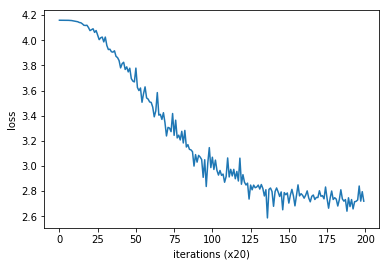

In [23]:
# 学習開始
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# 後ほど利用できるように、必要なデータを保存
word_vecs = model.word_vecs
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl' 
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

## （自習用） CBOW 実装前の理解のための実装

In [ ]:
# #実装前の理解のための実装

# c0 = np.array([[1,0,0,0,0,0,0,0]]) # Context data Input
# c2 = np.array([[0,0,1,0,0,0,0,0]]) # Context data Input

# #初期化した重み
# W_in = np.random.randn(8, 3)
# W_out = np.random.randn(3, 8)

# #中間層にForwardPropする
# h0 = np.dot(c0, W_in)
# h1 = np.dot(c2, W_in)
# h = 0.5 * (h0 + h1)
# s = np.dot(h, W_out)

# print(s)





## （自習用）日本語

In [ ]:
import re

import MeCab
tagger = MeCab.Tagger("-Owakati")

text = open('./sample.txt', 'r')

# 改行をなくす
kaisekiyou = text.read().split('¥n')
string = ' '.join(kaisekiyou)
mecab = tagger.parse(string)

print(mecab)